水果图片分类

包含1036张水果图片，共5个类别（苹果288张、香蕉275张、葡萄
216张、橙子276张、梨251张）

In [1]:
# !cp /content/drive/MyDrive/DL/data_test/fruits.zip ./

In [2]:
# !unzip -qq fruits.zip

In [3]:
# import os

# for root, dirs, files in os.walk('fruits'):
#     for file in files:
#         # 获取子文件夹名
#         subdir_name = os.path.basename(root)
#         # 构造新的文件名
#         new_file_name = f"{subdir_name}.{file}"
#         # 获取文件的原始完整路径
#         old_file_path = os.path.join(root, file)
#         # 获取新的文件完整路径
#         new_file_path = os.path.join(root, new_file_name)
#         # 重命名文件
#         os.rename(old_file_path, new_file_path)

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

In [5]:
base_dir = 'fruits'

# data preprocessing
from tensorflow.keras.utils import image_dataset_from_directory

train_ds, validation_ds = image_dataset_from_directory(base_dir, label_mode='categorical',validation_split=0.2,subset="both",batch_size=32,image_size=(180, 180),seed=42)

Found 1306 files belonging to 5 classes.
Using 1045 files for training.
Using 261 files for validation.


In [6]:
train_ds.class_names

['apple', 'banana', 'grape', 'orange', 'pear']

In [7]:
validation_ds.class_names

['apple', 'banana', 'grape', 'orange', 'pear']

In [8]:
# 计算validation_ds的大小
num_validation_samples = tf.data.experimental.cardinality(validation_ds).numpy()

In [9]:
num_validation_samples

9

In [10]:
# 定义我们想要用于验证的样本数量，剩下的将用于测试
num_val_samples = int(num_validation_samples * 0.5)

In [11]:
num_val_samples

4

In [12]:
val_ds = validation_ds.take(num_val_samples)

In [13]:
test_ds = validation_ds.skip(num_val_samples)

In [16]:
from keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Dropout(0.5)(x)
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(5, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [17]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                             

In [18]:
model.compile(loss="categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [19]:
history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds)

Epoch 1/30
33/33 [==============================] - 9s 93ms/step - loss: 4.8970 - accuracy: 0.2325 - val_loss: 1.5861 - val_accuracy: 0.1641
Epoch 2/30
33/33 [==============================] - 2s 66ms/step - loss: 1.3967 - accuracy: 0.3933 - val_loss: 1.2182 - val_accuracy: 0.5078
Epoch 3/30
33/33 [==============================] - 2s 65ms/step - loss: 0.9339 - accuracy: 0.6651 - val_loss: 1.0185 - val_accuracy: 0.6250
Epoch 4/30
33/33 [==============================] - 2s 59ms/step - loss: 0.7777 - accuracy: 0.7043 - val_loss: 0.8928 - val_accuracy: 0.7422
Epoch 5/30
33/33 [==============================] - 2s 59ms/step - loss: 0.6181 - accuracy: 0.7646 - val_loss: 0.7527 - val_accuracy: 0.7422
Epoch 6/30
33/33 [==============================] - 2s 58ms/step - loss: 0.6319 - accuracy: 0.7876 - val_loss: 0.8239 - val_accuracy: 0.6875
Epoch 7/30
33/33 [==============================] - 2s 58ms/step - loss: 0.4638 - accuracy: 0.8373 - val_loss: 0.5568 - val_accuracy: 0.8359
Epoch 8/30
33

In [20]:
import matplotlib.pyplot as plt


def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

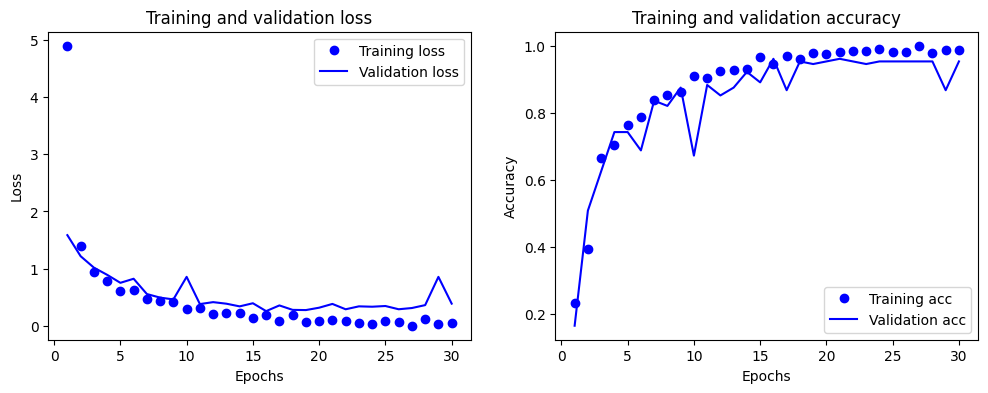

In [21]:
show_history(history)

In [22]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.3f}")

5/5 [==============================] - 1s 104ms/step - loss: 0.3252 - accuracy: 0.9248
Test accuracy: 0.925


In [23]:
from sklearn.metrics import classification_report

# 获取测试集的真实标签
y_true = np.concatenate([y for x, y in test_ds], axis=0)

In [25]:
# 获取预测结果
y_pred = model.predict(test_ds)

5/5 [==============================] - 0s 26ms/step


In [30]:
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_true = np.argmax(y_true, axis=1)

In [37]:
y_true

array([1, 0, 3, 2, 2, 3, 3, 3, 0, 1, 3, 3, 1, 2, 4, 3, 2, 2, 3, 2, 2, 0,
       3, 1, 1, 4, 4, 3, 3, 0, 0, 3, 0, 3, 0, 1, 1, 1, 1, 2, 4, 4, 2, 4,
       1, 0, 0, 4, 4, 1, 1, 0, 2, 0, 3, 4, 3, 1, 2, 1, 3, 1, 3, 0, 3, 0,
       0, 2, 1, 2, 4, 2, 3, 3, 4, 0, 0, 2, 1, 4, 0, 3, 2, 2, 0, 0, 1, 2,
       1, 0, 3, 0, 2, 4, 3, 4, 1, 4, 2, 3, 0, 3, 2, 1, 4, 1, 3, 2, 0, 0,
       1, 4, 0, 3, 4, 1, 3, 1, 2, 0, 3, 4, 0, 1, 4, 1, 0, 3, 4, 4, 4, 3,
       4])

In [38]:
# 生成分类报告
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        28
           1       0.89      0.93      0.91        27
           2       0.95      0.91      0.93        23
           3       0.97      0.97      0.97        31
           4       0.87      0.83      0.85        24

    accuracy                           0.92       133
   macro avg       0.92      0.92      0.92       133
weighted avg       0.92      0.92      0.92       133

